# Example of FitzHugh–Nagumo model

In [2]:
import brainpy as bp
import brainmodels

Compilation used 0.0000 s.
Start running ...
Run 10.0% used 0.008 s.
Run 20.0% used 0.016 s.
Run 30.0% used 0.021 s.
Run 40.0% used 0.028 s.
Run 50.0% used 0.033 s.
Run 60.0% used 0.039 s.
Run 70.0% used 0.046 s.
Run 80.0% used 0.051 s.
Run 90.0% used 0.057 s.
Run 100.0% used 0.063 s.
Simulation is done in 0.063 s.



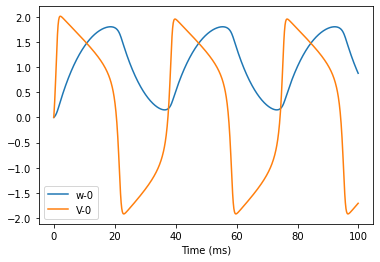

In [3]:
# simulation
fnh = brainmodels.neurons.FHN(1, monitors=['V', 'w'])
fnh.run(100., inputs=('input', 1.), report=0.1)
bp.visualize.line_plot(fnh.mon.ts, fnh.mon.w, legend='w')
bp.visualize.line_plot(fnh.mon.ts, fnh.mon.V, legend='V', show=True)

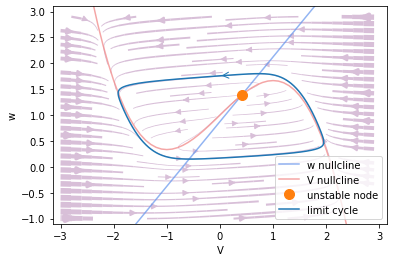

In [4]:
# phase plane analysis
phase = bp.sym_analysis.PhasePlane(
  # fnh, target_vars={'V': [-2, 2], 'w': [-0.5, 2.5]},
  fnh, target_vars={'V': [-3, 3], 'w': [-1, 3]},
  pars_update={'Iext': 1., 'a': 0.7, 'b': 0.8, 'tau': 12.5})
phase.plot_nullcline()
phase.plot_fixed_point()
phase.plot_limit_cycle_by_sim(initials={'V': -1, 'w': 1}, duration=100.)
phase.plot_vector_field(show=True)

C:\Users\adadu\miniconda3\envs\brainmodels\lib\site-packages\brain_py-1.1.0rc1-py3.7.egg\brainpy\analysis\symbolic_analysis\bifurcation.py:383: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


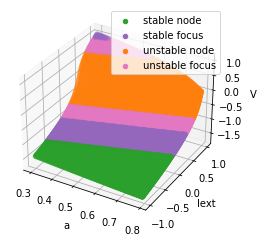

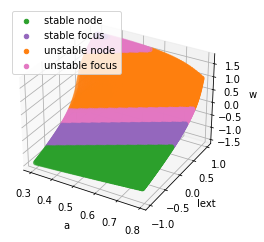

In [5]:
# bifurcation analysis
bifurcation = bp.sym_analysis.Bifurcation(
  fnh, target_pars=dict(a=[0.3, 0.8], Iext=[-1, 1], ),
  target_vars={'V': [-3, 2], 'w': [-2, 2]},
  pars_update={'b': 0.8, 'tau': 12.5},
  numerical_resolution=0.01)
_ = bifurcation.plot_bifurcation(show=True)